## Exercise 1: basic statistics and visualisation
The datasets we will be using throughout the practical exercises of this course are subsets of the FIFA 18 Complete Player Dataset from kaggle.com, which is extracted from the latest edition of FIFA, a football simulation game. In this dataset the player's attributes like personal data (e.g. Nationality, Club, Age, Value, …) and performances (e.g. Agression, Agility, Overall, Potential, …) of in total .. players are collected.

For the individuals tasks we will give you preprocessed data. This time, 42 features for you to discover.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

At first, load the 'data/fifa1.csv' as DataFrame, in order to work with it. To do so, use pandas read_csv method:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

Note: you only have to specify necessary parameters.

In [4]:
data = pd.read_csv("fifa1.csv")

At the beginning, get a first insight into the structure of the data. Verify that the shape of the dataset is (17076, 43), what means it contains 43 features (columns) and 17076 samples (rows). In addition print the data types of the columns and the top 5 rows of the DataFrame. 

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

In [16]:
print(data.head(n=5))
data.columns
data.shape

                Name  Age Nationality  Overall  Potential  \
0  Cristiano Ronaldo   32    Portugal       94         94   
1           L. Messi   30   Argentina       93         93   
2             Neymar   25      Brazil       92         94   
3          L. Suárez   30     Uruguay       92         92   
4           M. Neuer   31     Germany       92         92   

                  Club  Special  Acceleration  Aggression  Agility    ...      \
0       Real Madrid CF     2228            89          63       89    ...       
1         FC Barcelona     2154            92          48       90    ...       
2  Paris Saint-Germain     2100            94          56       96    ...       
3         FC Barcelona     2291            88          78       86    ...       
4     FC Bayern Munich     1493            58          29       52    ...       

   Shot power  Sliding tackle  Sprint speed  Stamina  Standing tackle  \
0          94              23            91       92               31   


(17076, 43)

Now that you have basic information about the dataset. Time to have a closer look at statistical properties of different features (columns). For this, implement 3 functions, each of which gets the column of a DataFrame as argument.

The first function *my_mean* should calculate the mean of a features (columns) sample distribution, defined as $mean(X) = \frac{1}{|X|}\sum_{x \in X}x$.

The second function *my_var* should calculate the variance of a features sample distribution, defined as the expected squared difference of the samples and their mean $var(X) = \frac{1}{|X|} \sum_{x \in X} (x - mean(X))^2$.

Finally calculate the median of a feature in *my_median*, which is the central value in an ordered version of the samples. So if $X = (x_1, x_2, ..., x_n)$ are the sorted values of a feature, it is defined as $median(X) = 
\begin{cases} 
x_{\frac{n+1}{2}} \text{ if $n$ is odd} \\
\frac{1}{2}(x_{\frac{n}{2}} + x_{\frac{n}{2}+1}) \text{ if $n$ is even}
\end{cases}
$.

For sorting you should use the 'sort_values' method: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_values.html

In addition, you have to reset the indices after sorting, using 'reset_index': http://pandas.pydata.org/pandas-docs/version/0.20.3/generated/pandas.DataFrame.reset_index.html

**Hint:** be aware of the 0-based indexing of pandas/numpy datatypes.

In [35]:
def my_mean(column):
    mean = 0 
    for c in column:
        mean = mean + c
    mean = mean/len(column)    
    return mean

def my_var(column):
    mean = my_mean(column)
    sumColumn = 0
    for c in column:
        c = (c - mean)**2
        sumColumn = sumColumn + c 
    var = sumColumn/len(column)
    return var

def my_median(column):
    column = np.sort(column)
    length = len(column)
    if length % 2 == 0:
        median = (column[int((length-1)/2)] + column[int((length-1)/2 + 1)])*0.5
    else:
        median = column[int((length-1)/2)]
    data.reset_index()
    return median

print(my_median(data.Age))


25.0


Use your function to compute mean, variance and median for the numerical features 
- Ball control
- Wage Euro
- Age
- Acceleration

Calculate the statistical measures using your own function and the pre-implemented version of numpy/pandas. Print for each of the features the name and the results.

In [32]:
features = ['Ball control', 'Wage Euro', 'Age', 'Acceleration']

for ft in features:
    column = data.get(ft)
    print("My Mean " + str(my_mean(column)) + " Numpy mean " + str(np.mean(column)))
    print("My Variance " + str(my_var(column)) + " Numpy variance " + str(np.var(column)))
    print("My Median " + str(my_median(column)) + " Numpy median " + str(np.median(column)))

My Mean 58.0630709768 Numpy mean 58.063070976809556
My Variance 281.917959274 Numpy variance 281.9179592737153
My Median 63.0 Numpy median 63.0
My Mean 11615.2494729 Numpy mean 11615.249472944484
My Variance 541926457.545 Numpy variance 541926457.5449996
My Median 4000.0 Numpy median 4000.0
My Mean 25.1143710471 Numpy mean 25.114371047083626
My Variance 21.3282755531 Numpy variance 21.328275553116313
My Median 25.0 Numpy median 25.0
My Mean 64.4823143593 Numpy mean 64.48231435933474
My Variance 223.40124496 Numpy variance 223.40124495997776
My Median 67.0 Numpy median 67.0


Next we want analyse some statistical dependencies. As an example calculate the following probabilities, based on the dataset:
- $p_1 = P(Wage~Euro > 100000)$
- $p_2 = P(Wage~Euro > 100000,~ Value~Euro > 10000000)$
- $p_3 = P(Wage~Euro > 100000~ |~ Value~Euro > 10000000)$

To do this, the following parts of the documentation might be useful:

https://pandas.pydata.org/pandas-docs/stable/indexing.html

http://pandas.pydata.org/pandas-docs/stable/computation.html

https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.math.html

In [45]:
column1 = data.get("Wage Euro")
column2 = data.get("Value Euro")
global_length = len(column)

#Wage Euro only = p1
p1 = []
for c in column1:
    if c > 100000: 
        p1.append(c)
p1_length = len(p1)
p1_prob = p1_length/global_length
print(p1_prob)

#Value Euro only = helper
p2 = []
for c in column2:
    if c > 10000000: 
        p2.append(c)
p2_length = len(p2)
p2_prob = p2_length/global_length
print(p2_prob)

#Wage + Value = p2
for l in range(0,global_length-1):
    c1=column1[l]
    c2=column2[l]
    p = 0
    if c1 > 100000 and c2 > 10000000:
        p = p + 1
p2 = p/global_length
print(p2)

0.011770906535488405
0.04872335441555399
0.0


Finally analyse the dataset visually by using matplotlib. Create histograms of:
- Wage Euro using 100 bins
- Age using 20 bins
- Stamina using 30 bins

See also:

https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html

Do not forget to add a title to each plot and to name the axes.

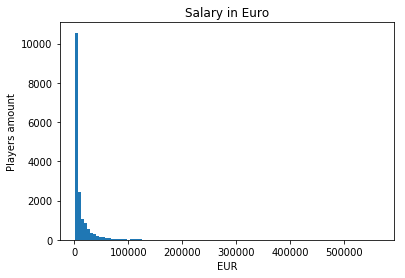

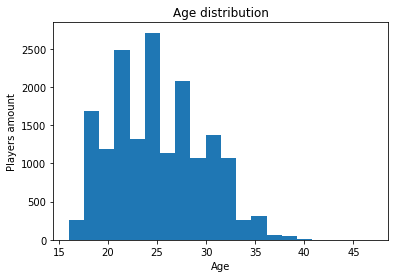

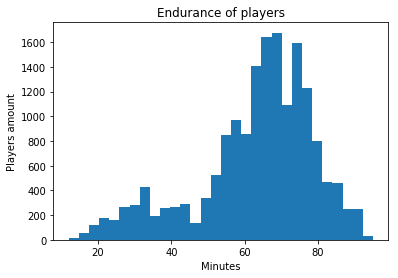

In [54]:
plt.figure()
plt.hist(data.get("Wage Euro"), 100)
plt.title("Salary in Euro")
plt.xlabel("EUR")
plt.ylabel("Players amount")
plt.show()

plt.figure()
plt.hist(data.get("Age"), 20)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Players amount")
plt.show()

plt.figure()
plt.hist(data.get("Stamina"), 30)
plt.title("Endurance of players")
plt.xlabel("Minutes")
plt.ylabel("Players amount")
plt.show()